# Density and Contour Plots

Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions.
There are three Matplotlib functions that can be helpful for this task: ``plt.contour`` for contour plots, ``plt.contourf`` for filled contour plots, and ``plt.imshow`` for showing images.
This section looks at several examples of using these. We'll start by setting up the notebook for plotting and importing the functions we will use: 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Visualizing a Three-Dimensional Function

We'll start by demonstrating a contour plot using a function $z = f(x, y)$, using the following particular choice for $f$ (we've seen this before in numpy broadcasting, when we used it as a motivating example for array broadcasting):

In [2]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

A contour plot can be created with the ``plt.contour`` function.
It takes three arguments: a grid of *x* values, a grid of *y* values, and a grid of *z* values.
The *x* and *y* values represent positions on the plot, and the *z* values will be represented by the contour levels.
Perhaps the most straightforward way to prepare such data is to use the ``np.meshgrid`` function, which builds two-dimensional grids from one-dimensional arrays:

In [3]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Now let's look at this with a standard line-only contour plot:

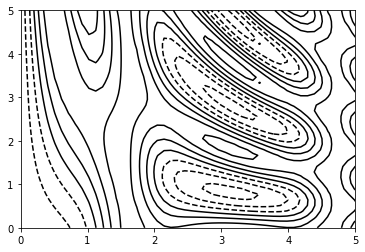

In [4]:
plt.contour(X, Y, Z, colors='black');

Notice that by default when a single color is used, negative values are represented by dashed lines, and positive values by solid lines.
Alternatively, the lines can be color-coded by specifying a colormap with the ``cmap`` argument.
Here, we'll also specify that we want more lines to be drawn—20 equally spaced intervals within the data range:

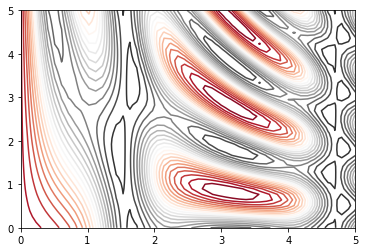

In [5]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

Here we chose the ``RdGy`` (short for *Red-Gray*) colormap, which is a good choice for centered data.
Matplotlib has a wide range of colormaps available, which you can easily browse in IPython by doing a tab completion on the ``plt.cm`` module:
```
plt.cm.<TAB>
```

Our plot is looking nicer, but the spaces between the lines may be a bit distracting.
We can change this by switching to a filled contour plot using the ``plt.contourf()`` function (notice the ``f`` at the end), which uses largely the same syntax as ``plt.contour()``.

Additionally, we'll add a ``plt.colorbar()`` command, which automatically creates an additional axis with labeled color information for the plot:

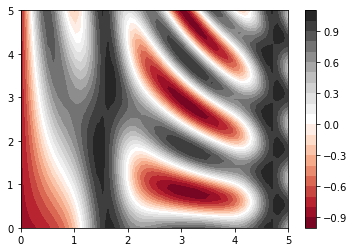

In [6]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

# Histograms, Binnings

A simple histogram can be a great first step in understanding a dataset.

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

data = np.random.randn(1000)

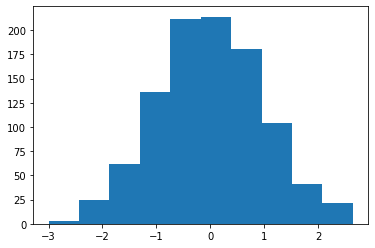

In [8]:
plt.hist(data);

The ``hist()`` function has many options to tune both the calculation and the display; 
here's an example of a more customized histogram:

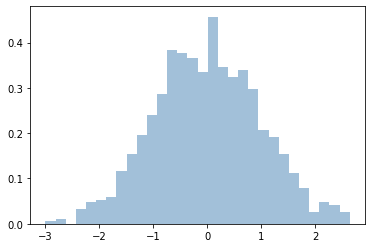

In [9]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

The ``plt.hist`` docstring has more information on other customization options available.
I find this combination of ``histtype='stepfilled'`` along with some transparency ``alpha`` to be very useful when comparing histograms of several distributions:

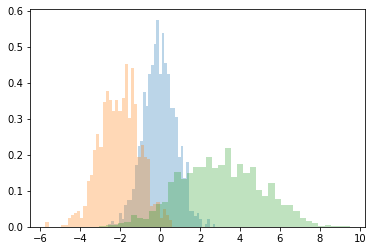

In [12]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the ``np.histogram()`` function is available:

In [11]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 28 198 426 285  63]
